In [241]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [242]:
df=pd.read_csv("datasets/retail.csv")

In [243]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [245]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [246]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [247]:
dic={}
for feature in df.columns:
    if df[feature].dtype =="O":
        dic[feature]=list(df[feature].unique())
    

In [248]:
del dic["Sub-Category"]

In [249]:
del dic["City"]
del dic["State"]

In [250]:
dic

{'Ship Mode': ['Second Class', 'Standard Class', 'First Class', 'Same Day'],
 'Segment': ['Consumer', 'Corporate', 'Home Office'],
 'Country': ['United States'],
 'Region': ['South', 'West', 'Central', 'East'],
 'Category': ['Furniture', 'Office Supplies', 'Technology']}

In [251]:
df.Profit=np.abs(df.Profit)

In [252]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


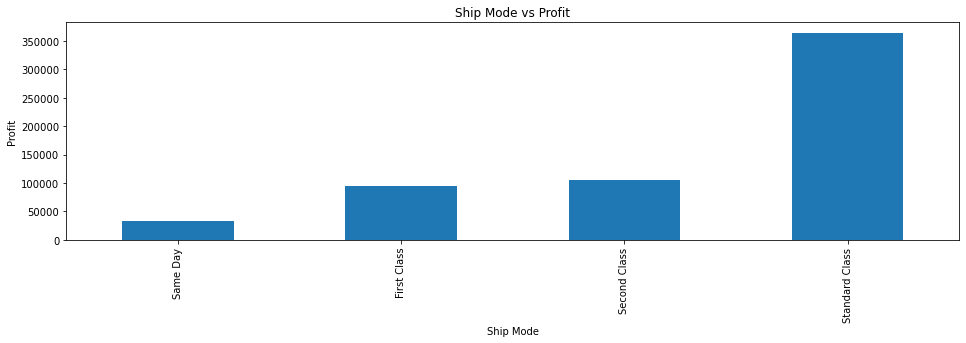

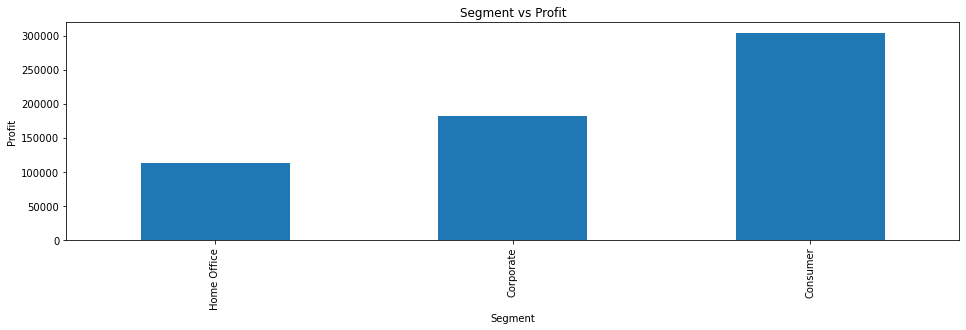

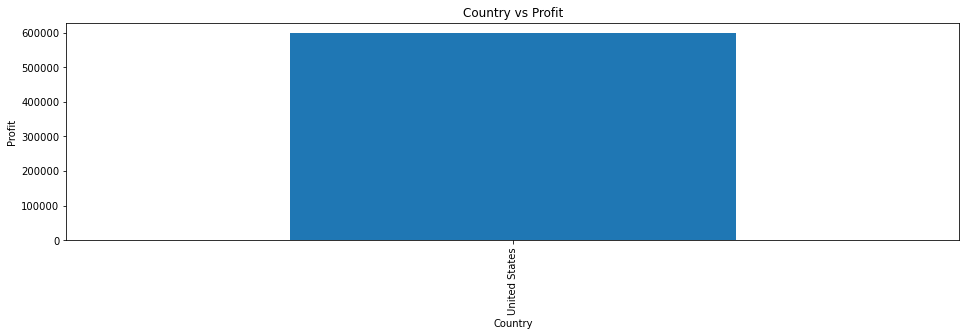

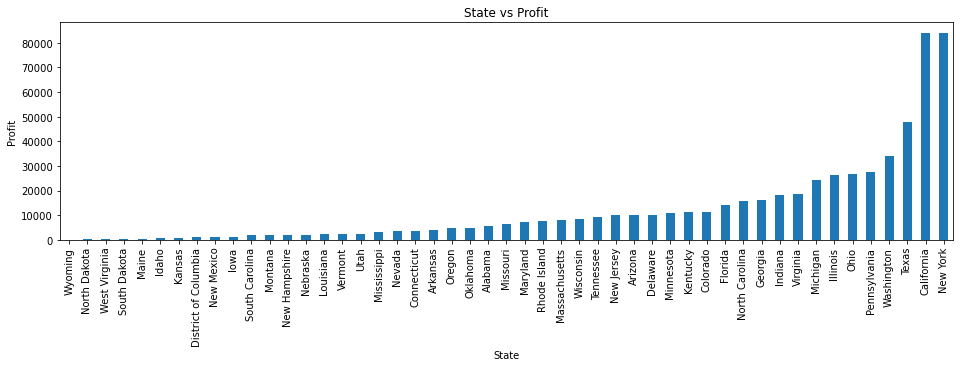

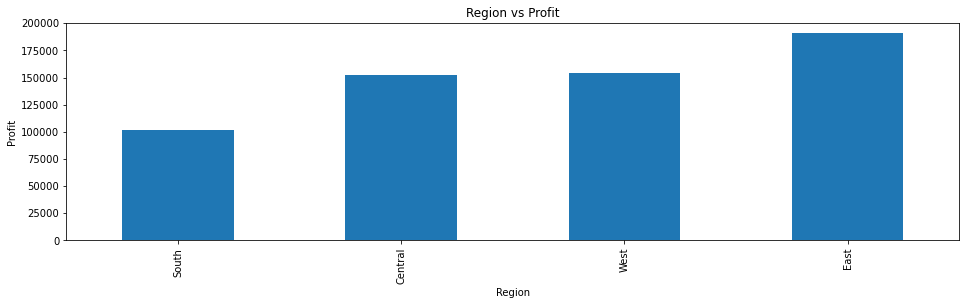

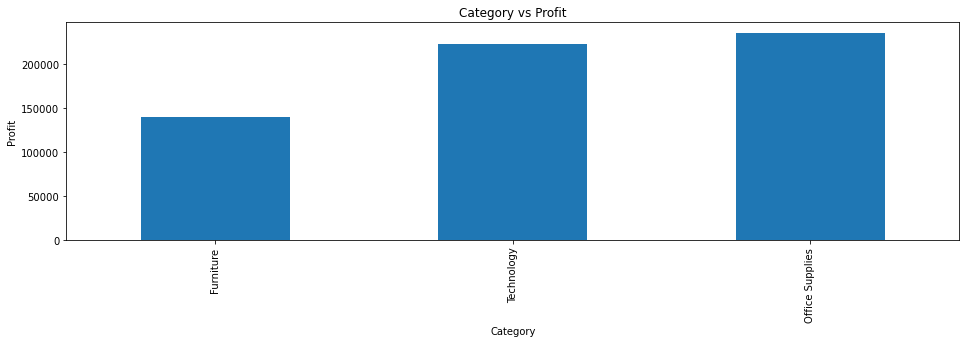

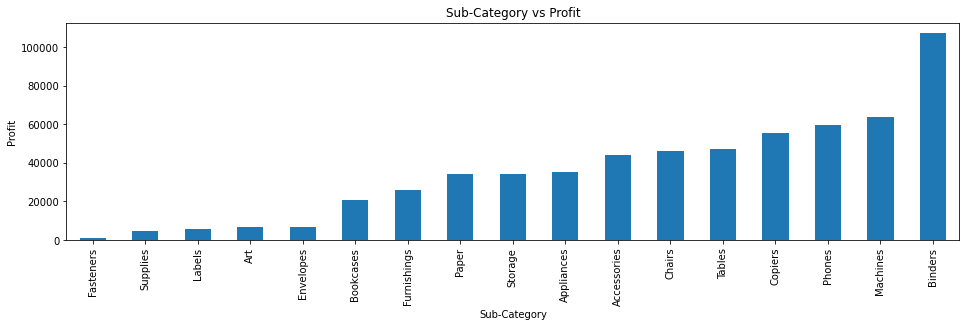

In [253]:
### For categorical feature 
for feature in df.columns:
    if df[feature].dtype=="O" and feature!="City":
        df.groupby(feature)["Profit"].sum().sort_values().plot(kind="bar",xlabel=feature,ylabel="Profit",figsize=(16,4))
        plt.title(feature+ " vs Profit")
        plt.show()

In [254]:
len(df["Postal Code"].unique())

631

In [255]:
# df.groupby("State")["City"].count().plot(kind="bar",figsize=(14,10))

# df.groupby("State")["Profit"].sum().plot(kind="bar",figsize=(14,8))
# plt.show()

In [256]:
profit=df.groupby("State")["Profit"].sum()
city=df.groupby("State")["City"].count()
index=profit.index

In [257]:
# cityval=city.values
# profitval=profit.values

In [258]:
cityprofit=pd.concat([profit,city],axis=1)
cityprofit

,Profit,City
State,,
Alabama,5786.8253,61
Arizona,9885.6104,224
Arkansas,4008.6871,60
California,83920.7173,2001
Colorado,11273.9517,182
Connecticut,3550.7210,82
Delaware,10149.1674,96
District of Columbia,1059.5893,10
Florida,13980.3573,383


In [222]:
# cityprofit["citylen"]=cityprofit.City.astype(str)

In [223]:
# cityprofit.head()

,Profit,City,citylen
State,,,
Alabama,5786.8253,61,61
Arizona,9885.6104,224,224
Arkansas,4008.6871,60,60
California,83920.7173,2001,2001
Colorado,11273.9517,182,182


In [224]:
# cityprofit["citylen"]=cityprofit["citylen"].apply(lambda x:len(x))


In [225]:
# cityprofit.head()

,Profit,City,citylen
State,,,
Alabama,5786.8253,61,2
Arizona,9885.6104,224,3
Arkansas,4008.6871,60,2
California,83920.7173,2001,4
Colorado,11273.9517,182,3


In [233]:
import warnings
warnings.filterwarnings("ignore")

In [234]:
# cityprofit["Norm Profit"]=cityprofit.Profit.astype(str)
# for i in range(len(cityprofit)):
#     cityprofit["Norm Profit"].iloc[i]=cityprofit["Norm Profit"].iloc[i][:cityprofit["citylen"].iloc[i]]

In [235]:
# cityprofit["Norm Profit"]=cityprofit["Norm Profit"].astype(int)

In [236]:
# cityprofit.head(10)

,Profit,City,citylen,Norm Profit
State,,,,
Alabama,5786.8253,61,2,57
Arizona,9885.6104,224,3,988
Arkansas,4008.6871,60,2,40
California,83920.7173,2001,4,8392
Colorado,11273.9517,182,3,112
Connecticut,3550.7210,82,2,35
Delaware,10149.1674,96,2,10
District of Columbia,1059.5893,10,2,10
Florida,13980.3573,383,3,139


<AxesSubplot:xlabel='State'>

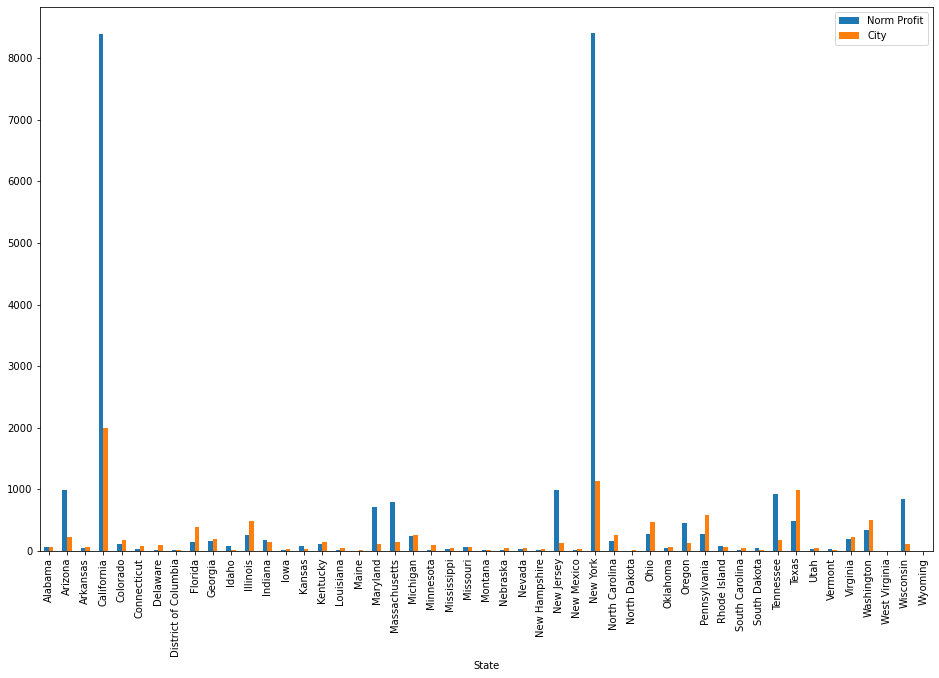

In [237]:
# cityprofit.plot(y=["Norm Profit","City"],kind="bar",figsize=(16,10))

In [240]:
# cityprofit[cityprofit["Norm Profit"]<cityprofit["City"]]

,Profit,City,citylen,Norm Profit
State,,,,
Alabama,5786.8253,61,2,57
Arkansas,4008.6871,60,2,40
Colorado,11273.9517,182,3,112
Connecticut,3550.7210,82,2,35
Delaware,10149.1674,96,2,10
Florida,13980.3573,383,3,139
Georgia,16250.0433,184,3,162
Illinois,26395.5080,492,3,263
Iowa,1183.8119,30,2,11
